In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K

In [ ]:
# mount your Google drive so that you only have to download the data only once
from google.colab import drive
drive.mount('/content/drive/')

In [2]:
######load your data#######
import os
from os import walk
import numpy as np
# load your data
paths = ["/content/drive/MyDrive/SampledGuitar/Stratocaster/BluesDriver",
         "/content/drive/MyDrive/SampledGuitar/Stratocaster/Chorus",
         "/content/drive/MyDrive/SampledGuitar/Stratocaster/Clean",
         "/content/drive/MyDrive/SampledGuitar/Stratocaster/Digital Delay",
         "/content/drive/MyDrive/SampledGuitar/Stratocaster/Flanger",
         "/content/drive/MyDrive/SampledGuitar/Stratocaster/Phaser",
         "/content/drive/MyDrive/SampledGuitar/Stratocaster/RAT",
         "/content/drive/MyDrive/SampledGuitar/Stratocaster/Sweep Echo",
         "/content/drive/MyDrive/SampledGuitar/Stratocaster/TapeEcho",
         "/content/drive/MyDrive/SampledGuitar/Stratocaster/TubeScreamer"
         ]
#print(paths)
audios = []
labels = []
labelsname = []
for i in paths:
    for (dirpath, dirnames, filenames) in walk(i):
      for directory in dirpath:
        for filename in filenames:
            audios.append(os.path.join(dirpath, filename))
        #print(filenames)
        #audios.append(filenames)
        break


In [ ]:
print(len(audios))

6901


In [3]:
###rawwaveform
import librosa
import numpy as np

waveforms = []
#nsr = 22050

for track in audios[:69]:
  if track.endswith("wav"):
    y,fs = librosa.load(track)
    waveforms.append(librosa.resample(y[:48000],48000,16000))

#data = np.array(data)
#datastft = np.array(datastft)
waveforms = np.array(waveforms)

#print(data.shape)
#print(datastft.shape)
print(waveforms.shape)

(69, 16000)


In [4]:
###normalizar y cambio de dimensionalidad
mu_wave = np.mean(waveforms, axis= 1)[...,np.newaxis]#[...,np.newaxis][...,np.newaxis]
max_wave = np.max(waveforms, axis=1)[...,np.newaxis]#[...,np.newaxis][...,np.newaxis]

Xw = (waveforms-mu_wave)/max_wave
#Xw = Xw
print(Xw.shape)

(69, 16000)


In [ ]:
# plot ALL of your training data using t-SNE and PCA (must plot both)
import matplotlib.pyplot as plt
from sklearn.decomposition import  PCA
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig,elev=-20, azim=100)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(Xw)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='red', label='fx1')
ax.scatter3D(X_PCA[690:1379, 0], X_PCA[690:1379, 1],X_PCA[690:1379, 2], c='green', label='fx2')
ax.scatter3D(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1],X_PCA[1380:2069, 2], c='blue', label='fx3')
ax.scatter3D(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1],X_PCA[2070:2759, 2], c='red', label='fx4')
ax.scatter3D(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1],X_PCA[2760:3449, 2], c='yellow', label='fx5')
ax.scatter3D(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1],X_PCA[3450:4139, 2], c='black', label='fx6')
ax.scatter3D(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1],X_PCA[4140:4829, 2], c='white', label='fx7')
ax.scatter3D(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1],X_PCA[4830:5519, 2], c='orange', label='fx8')
ax.scatter3D(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1],X_PCA[5520:6209, 2], c='pink', label='fx9')
ax.scatter3D(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1],X_PCA[6210:6899, 2], c='brown', label='fx10')





#plt.scatter(X_PCA[400:599, 0], X_PCA[400:599, 1],X_PCA[:689, 2], c='blue', label='grain')
#plt.scatter(X_PCA[600:799, 0], X_PCA[600:799, 1], c='orange', label='res')
#plt.scatter(X_PCA[800:999, 0], X_PCA[800:999, 1], c='yellow', label='waveshapping')

plt.legend()
plt.title('Analisis de componentes Principales "2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


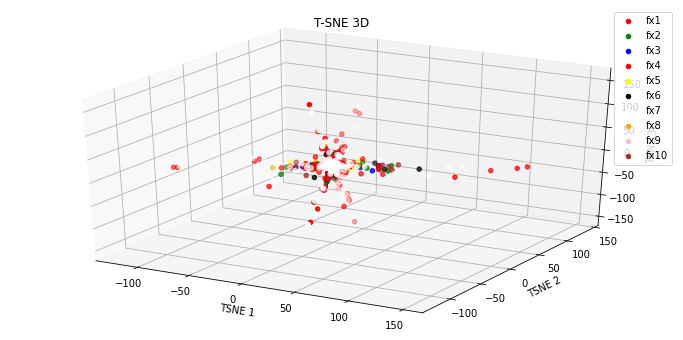

In [ ]:
###t-SNE
from sklearn.manifold import TSNE  # for t-SNE
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig,elev=-20, azim=100)
tsne = TSNE(n_components= 3)  # create an instance of t-SNE
ax = plt.axes(projection = "3d")
X_tsne = tsne.fit_transform(Xw)  # fit and transform the data
ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='red', label='fx1')
ax.scatter3D(X_PCA[690:1379, 0], X_PCA[690:1379, 1],X_PCA[690:1379, 2], c='green', label='fx2')
ax.scatter3D(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1],X_PCA[1380:2069, 2], c='blue', label='fx3')
ax.scatter3D(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1],X_PCA[2070:2759, 2], c='red', label='fx4')
ax.scatter3D(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1],X_PCA[2760:3449, 2], c='yellow', label='fx5')
ax.scatter3D(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1],X_PCA[3450:4139, 2], c='black', label='fx6')
ax.scatter3D(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1],X_PCA[4140:4829, 2], c='white', label='fx7')
ax.scatter3D(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1],X_PCA[4830:5519, 2], c='orange', label='fx8')
ax.scatter3D(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1],X_PCA[5520:6209, 2], c='pink', label='fx9')
ax.scatter3D(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1],X_PCA[6210:6899, 2], c='brown', label='fx10')


#ax.view_init(30,60)
plt.title('T-SNE 3D')
ax.set_xlabel('TSNE 1')
ax.set_ylabel('TSNE 2')
ax.set_zlabel('TSNE 3')
ax.legend()
plt.show()

In [5]:
Xw = Xw[...,np.newaxis][...,np.newaxis]
print(Xw.shape)

(69, 16000, 1, 1)


In [54]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape
from keras import layers
#from keras.layers import BatchNormalization
from keras.models import Model
from keras.datasets import mnist
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def Sampling(inputs):
  z_mean, z_log_sigma = inputs
  epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
  return z_mean + K.exp(z_log_sigma) * epsilon

In [56]:
latent_dim = 128
original_dim = (16000, 1, 1)
encoder_inputs = keras.Input((16000, 1, 1))                                                   # bat, samps, ?, ch
x = layers.Conv2D(64, (33,1), activation="relu", padding="same",strides=(4,1))(encoder_inputs) # [69, 48000, 1, 1] -> [69, 12000, 1, 64]
x = layers.Conv2D(128,(33,1), activation="relu", padding="same",strides=(4,1))(x)
x = layers.Conv2D(256,(33,1), activation="relu", padding="same",strides=(4,1))(x)
latent = layers.Conv2D(512,(33,1), activation="relu", padding="same",strides=(3,1))(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
z_mean = layers.Dense(units=latent_dim, name='Z-Mean')(x) # Mean component
z_log_sigma = layers.Dense(units=latent_dim, name='Z-Log-Sigma')(x) # Standard deviation component
z = Lambda(Sampling, name='Z-Sampling-Layer')([z_mean, z_log_sigma]) # Z sampling layer
encoder = keras.Model(encoder_inputs, [z_mean, z_log_sigma, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 16000, 1, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_28 (Conv2D)             (None, 4000, 1, 64)  2176        ['input_15[0][0]']               
                                                                                                  
 conv2d_29 (Conv2D)             (None, 1000, 1, 128  270464      ['conv2d_28[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
'''
###normalmente filtros son inpares 
latent_dim = 480
original_dim = (48000, 1, 1)
encoder_inputs = keras.Input((48000, 1, 1))                                                   # bat, samps, ?, ch
x = layers.Conv2D(64, (8,1), activation="relu", padding="same",strides=(4,1))(encoder_inputs) # [69, 48000, 1, 1] -> [69, 12000, 1, 64]
x = layers.Conv2D(128,(8,1), activation="relu", padding="same",strides=(4,1))(x)
x = layers.Conv2D(256,(8,1), activation="relu", padding="same",strides=(4,1))(x)
latent = layers.Conv2D(512,(8,1), activation="relu", padding="same",strides=(3,1))(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
z_mean = layers.Dense(units=latent_dim, name='Z-Mean')(x) # Mean component
z_log_sigma = layers.Dense(units=latent_dim, name='Z-Log-Sigma')(x) # Standard deviation component
z = Lambda(Sampling, name='Z-Sampling-Layer')([z_mean, z_log_sigma]) # Z sampling layer
encoder = keras.Model(encoder_inputs, [z_mean, z_log_sigma, z], name="encoder")
encoder.summary()


In [57]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(250 * 1 * 256, activation="relu")(latent_inputs)
x = layers.Reshape((250, 1, 256))(x)
#x = layers.Conv2DTranspose(512,(4,1), activation="relu",padding= "same",strides= (3,1))(x)
x = layers.Conv2DTranspose(128,(33,1), activation="relu",padding= "same",strides= (4,1))(x)
x = layers.Conv2DTranspose(64,(33,1), activation="relu",padding= "same",strides= (4,1))(x)
#x = layers.Conv2DTranspose(64,(16,1), activation="relu",padding= "same",strides=(4,1))(x)
decoder_outputs = layers.Conv2DTranspose(1, (33, 1), activation="tanh", padding="same", strides = (4,1))(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 128)]             0         
                                                                 
 dense_15 (Dense)            (None, 64000)             8256000   
                                                                 
 reshape_7 (Reshape)         (None, 250, 1, 256)       0         
                                                                 
 conv2d_transpose_21 (Conv2D  (None, 1000, 1, 128)     1081472   
 Transpose)                                                      
                                                                 
 conv2d_transpose_22 (Conv2D  (None, 4000, 1, 64)      270400    
 Transpose)                                                      
                                                                 
 conv2d_transpose_23 (Conv2D  (None, 16000, 1, 1)      2113

In [58]:
# Define outputs from a VAE model by specifying how the encoder-decoder models are linked
outpt = decoder(encoder(encoder_inputs)[2]) # note, outputs available from encoder model are z_mean, z_log_sigma and z. We take z by specifying [2]
# Instantiate a VAE model
vae = Model(inputs=encoder_inputs, outputs=outpt, name='VAE-Model')

In [62]:
# Reconstruction loss compares inputs and outputs and tries to minimise the difference
def vae_loss(x,y):
  r_loss = keras.losses.mse(x, y)  # use MSE
  #kl_loss = K.mean(K.sum(-0.5 * (1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma))))
  #vae_loss = K.mean(r_loss + kl_loss)
  return r_loss

vae.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.0001) ,loss = vae_loss)

In [28]:
'''
# Reconstruction loss compares inputs and outputs and tries to minimise the difference
r_loss = keras.losses.mse(encoder_inputs, outpt)  # use MSE
kl_loss = K.mean(K.sum(-0.5 * (1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma))))
vae_loss = K.mean(r_loss + kl_loss)

vae.add_loss(vae_loss)

vae.compile(optimizer='adam')#,loss = vae_loss)

In [60]:
def vae_loss(x,y):
  r_loss = keras.losses.mse(x, y)  # use MSE
  kl_loss = K.mean(K.sum(-0.5 * (1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma))))
  vae_loss = K.mean(r_loss + kl_loss)
  return vae_loss

vae.compile(optimizer='adam',loss = vae_loss)

#vae.fit(Xw,Xw, shuffle = True, batch_size= 5, epochs=500) # batch_size= 5#, callbacks=[NewCallback(current_epoch)])

In [ ]:
vae.fit(Xw,Xw, shuffle = True, batch_size= 5, epochs=500) # batch_size= 5#, callbacks=[NewCallback(current_epoch)])

In [64]:
#display a 2D plot of the digit classes in the latent space
q , w, e= encoder.predict(Xw)
#z_mean = np.array(z_mean)
#print(z_mean.shape)
#plt.scatter(z_mean[0],z_mean[1], alpha=0.5)
#plt.show()

In [65]:
print(q.shape)
b = q[1][...,np.newaxis].T
print(b.shape)

(69, 128)
(1, 128)


In [ ]:
a = decoder.predict(b)
#print(len(z_mean[0][0]))

In [ ]:
x = a.flatten()
print(x.shape)

(48000,)


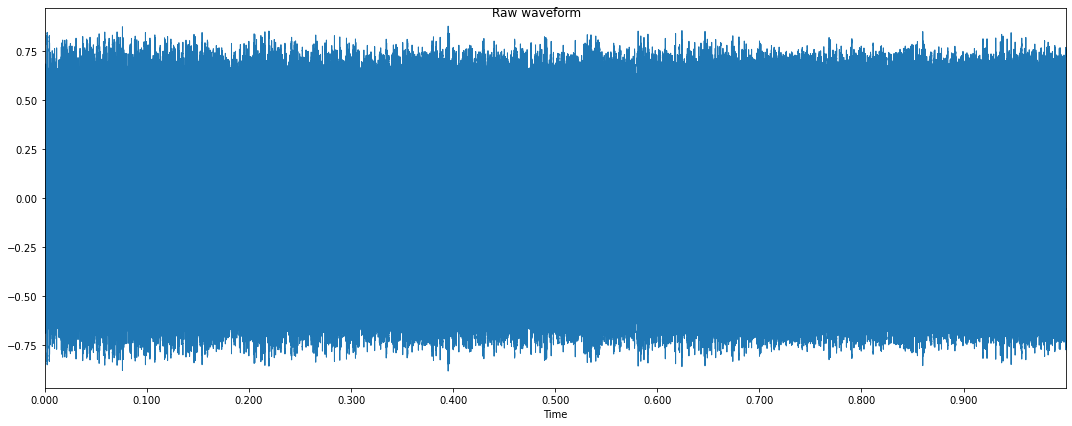

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(15, 6)).suptitle("Raw waveform")
sonidos = [1,2,3,4]
#sonidos = [i for i in range(5)]
labelsname = ["Am","Fm","Grain","Res","Waveshapping"]

#plt.subplot(2, 5, i+ 1).set_title(reconstruccion)
librosa.display.waveplot(x, sr = 48000)
plt.tight_layout()

plt.show()

In [ ]:
# visualize a few raw datapoints to get an idea about your "raw" data
# what are the units in the plot you are showing us?
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(15, 6)).suptitle("Raw waveform")
sonidos = [1,2,3,4]
#sonidos = [i for i in range(5)]
labelsname = ["Am","Fm","Grain","Res","Waveshapping"]

for i, x in enumerate(sonidos):
    print(x)
    plt.subplot(2, 5, i+ 1).set_title(labelsname[i])
    librosa.display.waveplot(z_mean[x].flatten(),sr = 48000)
plt.tight_layout()

plt.show()

128


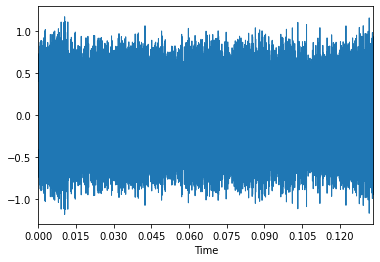

In [ ]:
print(len(z_mean[0][1]))
librosa.display.waveplot(z_mean[1].flatten(),sr = 48000)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


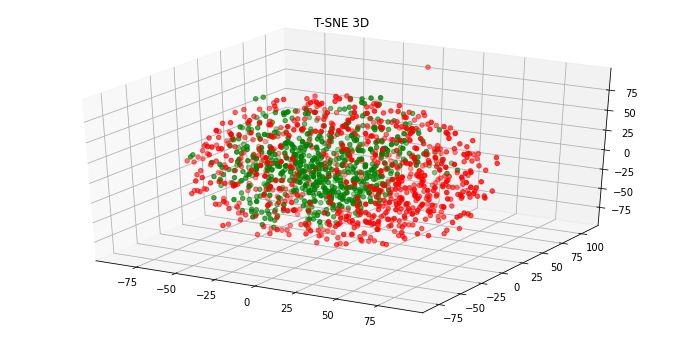

In [ ]:
from sklearn.manifold import TSNE 

fig = plt.figure(1, figsize=(12, 6))
#a3x = Axes3D(fig,elev=-20, azim=100)
tsne = TSNE(n_components= 3)  # create an instance of t-SNE
ax = plt.axes(projection = "3d")
X_PCA = tsne.fit_transform(z_mean)  # fit and transform the data
ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='red', label='fx1')
ax.scatter3D(X_PCA[690:1379, 0], X_PCA[690:1379, 1],X_PCA[690:1379, 2], c='green', label='fx2')
ax.scatter3D(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1],X_PCA[1380:2069, 2], c='blue', label='fx3')
ax.scatter3D(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1],X_PCA[2070:2759, 2], c='red', label='fx4')
ax.scatter3D(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1],X_PCA[2760:3449, 2], c='yellow', label='fx5')
ax.scatter3D(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1],X_PCA[3450:4139, 2], c='black', label='fx6')
ax.scatter3D(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1],X_PCA[4140:4829, 2], c='white', label='fx7')
ax.scatter3D(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1],X_PCA[4830:5519, 2], c='orange', label='fx8')
ax.scatter3D(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1],X_PCA[5520:6209, 2], c='pink', label='fx9')
ax.scatter3D(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1],X_PCA[6210:6899, 2], c='brown', label='fx10')
#ax.view_init(30,60)
plt.title('T-SNE 3D')
#ax.set_xlabel('TSNE 1')
#ax.set_ylabel('TSNE 2')
#ax.set_zlabel('TSNE 3')
#ax.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:595: RuntimeWarning: divide by zero encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var.sum()


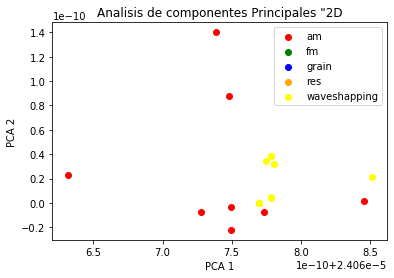

In [ ]:
# plot ALL of your training data using t-SNE and PCA (must plot both)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(z_mean)

plt.scatter(X_PCA[:199, 0], X_PCA[:199, 1], c='red', label='am')
plt.scatter(X_PCA[200:399, 0], X_PCA[200:399, 1], c='green', label='fm')
plt.scatter(X_PCA[400:599, 0], X_PCA[400:599, 1], c='blue', label='grain')
plt.scatter(X_PCA[600:799, 0], X_PCA[600:799, 1], c='orange', label='res')
plt.scatter(X_PCA[800:999, 0], X_PCA[800:999, 1], c='yellow', label='waveshapping')

plt.legend()
plt.title('Analisis de componentes Principales "2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

0
50
100
150
200


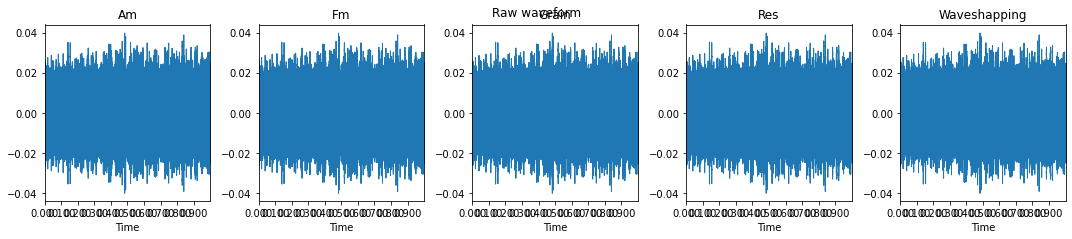

In [ ]:
# visualize a few raw datapoints to get an idea about your "raw" data
# what are the units in the plot you are showing us?
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(15, 6)).suptitle("Raw waveform")
sonidos = [0,50,100,150,200]
#sonidos = [i for i in range(5)]
labelsname = ["Am","Fm","Grain","Res","Waveshapping"]

for i, x in enumerate(sonidos):
    print(x)
    plt.subplot(2, 5, i+ 1).set_title(labelsname[i])
    librosa.display.waveplot(a[x].flatten(),sr = 48000)
plt.tight_layout()

plt.show()

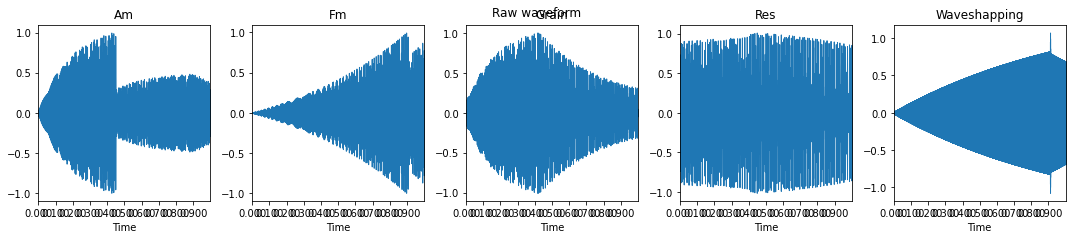

In [ ]:
# visualize a few raw datapoints to get an idea about your "raw" data
# what are the units in the plot you are showing us?
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(15, 6)).suptitle("Raw waveform")
sonidos = [0,50,100,150,200]
#sonidos = [i for i in range(5)]
labelsname = ["Am","Fm","Grain","Res","Waveshapping"]

for i, x in enumerate(sonidos):
    #print(x)
    plt.subplot(2, 5, i+ 1).set_title(labelsname[i])
    librosa.display.waveplot(Xw[x].flatten(), sr = 48000)
plt.tight_layout()

plt.show()